# **Week 2 Assignment 1**
## **Data Exploration: Cooling and Warming Centers in LA County**
### **Name: Myranda Arreola**

### Through this data exploration, I discovered that there are no warming centers identified by the data (column: cat3). I'm curious if there is a way to group the city data by county district to simplify the graphs and maps.

In [1]:
# importing python libraries
import pandas as pd
import geopandas as gpd

In [2]:
# read and add file to notebook
cwc = gpd.read_file('Cooling_and_Warming_Centers.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
# what is the data type?
type(cwc)

geopandas.geodataframe.GeoDataFrame

In [4]:
# how many rows and columns?
cwc.shape

(92, 30)

In [5]:
# dataframe info
cwc.info

<bound method DataFrame.info of     OBJECTID                                             source ext_id  \
0        900                                                211   None   
1        944                                                211   None   
2       1913                                                211   None   
3       1946                                                211   None   
4       1949                                                211   None   
..       ...                                                ...    ...   
87     71403  LA County Department of Community and Senior S...   None   
88     71405  LA County Department of Community and Senior S...   None   
89     71407  LA County Department of Community and Senior S...   None   
90     71410  LA County Department of Community and Senior S...   None   
91     71412  LA County Department of Community and Senior S...   None   

                  cat1            cat2  cat3  \
0   Emergency Response  Cooling

In [6]:
# what does the data look like?
cwc.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,email,date_updated,dis_status,POINT_X,POINT_Y,geometry
0,900,211,None,Emergency Response,Cooling Center,None,www.asianyouthcenter.org,Asian Youth Center,100 W. Clary Ave.,None,...,http://egis3.lacounty.gov/lms/?p=1061,publish,34.097646,-118.100244,None,2016-05-02 12:40:17+00:00,None,6.531322e+06,1.857931e+06,POINT (-118.10024 34.09765)
1,944,211,None,Emergency Response,Cooling Center,None,www.ci.claremont.ca.us,City Of Claremont Senior Services - Joslyn Sen...,660 N. Mountain Ave.,None,...,http://egis3.lacounty.gov/lms/?p=1072,publish,34.099674,-117.728518,None,2016-04-27 15:55:43+00:00,None,6.643859e+06,1.858765e+06,POINT (-117.72852 34.09967)
2,1913,211,None,Emergency Response,Cooling Center,None,www.onegeneration.org,Onegeneration - Senior Enrichment Center,18255 Victory Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=2068,publish,34.187236,-118.531121,None,2016-05-02 11:44:08+00:00,None,6.401048e+06,1.890943e+06,POINT (-118.53112 34.18724)
3,1946,211,None,Emergency Response,Cooling Center,None,css.lacounty.gov,Los Angeles County Community And Senior Servic...,14112 S. Kingsley Dr.,None,...,http://egis3.lacounty.gov/lms/?p=2107,publish,33.902870,-118.303890,None,2016-04-28 09:22:12+00:00,None,6.469454e+06,1.787172e+06,POINT (-118.30389 33.90287)
4,1949,211,None,Emergency Response,Cooling Center,None,www.cityofsandimas.com,City Of San Dimas Parks And Recreation Departm...,201 E. Bonita Ave.,None,...,http://egis3.lacounty.gov/lms/?p=2108,publish,34.107240,-117.804700,None,2016-05-02 12:07:55+00:00,None,6.620790e+06,1.861464e+06,POINT (-117.80470 34.10724)


In [8]:
# dataframe info
cwc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   OBJECTID      92 non-null     int64              
 1   source        89 non-null     object             
 2   ext_id        0 non-null      object             
 3   cat1          92 non-null     object             
 4   cat2          92 non-null     object             
 5   cat3          0 non-null      object             
 6   org_name      61 non-null     object             
 7   Name          92 non-null     object             
 8   addrln1       92 non-null     object             
 9   addrln2       1 non-null      object             
 10  city          92 non-null     object             
 11  state         92 non-null     object             
 12  hours         92 non-null     object             
 13  phones        92 non-null     object             
 14  url 

In [9]:
# what are the columns?
cwc.columns.to_list()

['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'addrln1',
 'addrln2',
 'city',
 'state',
 'hours',
 'phones',
 'url',
 'info1',
 'info2',
 'post_id',
 'description',
 'zip',
 'link',
 'use_type',
 'latitude',
 'longitude',
 'email',
 'date_updated',
 'dis_status',
 'POINT_X',
 'POINT_Y',
 'geometry']

In [12]:
# values for a single column
cwc.Name.sample(5)

7     City Of Arcadia Recreation And Community Servi...
90    City of Whittier - Parnell Park Community and ...
34    YWCA Of San Gabriel Valley Intervale Senior Se...
59    LA County Library - Lloyd Taber-Marina Del Rey...
54                   LA County Library - Duarte Library
Name: Name, dtype: object

In [16]:
# cooling centers per city
cwc['city'].value_counts()

city
Los Angeles         9
Claremont           4
Whittier            4
Azusa               3
Santa Clarita       3
Pomona              3
Norwalk             3
Glendale            2
Lakewood            2
Burbank             2
Compton             2
Altadena            2
Baldwin Park        2
Downey              2
El Monte            2
Torrance            2
Monrovia            2
South Pasadena      2
Arcadia             2
Gardena             2
La Puente           1
Montebello          1
Hawaiian Gardens    1
Marina Del Rey      1
Manhattan Beach     1
San Fernando        1
Paramount           1
Rowland Heights     1
Alhambra            1
Westlake Village    1
Littlerock          1
Newhall             1
La Mirada           1
Palmdale            1
Duarte              1
Irwindale           1
San Gabriel         1
Covina              1
Diamond Bar         1
Monterey Park       1
Reseda              1
San Dimas           1
Lancaster           1
Canoga Park         1
San Pedro           1
South

In [17]:
# save it as a variable
city_count = cwc['city'].value_counts()
city_count

city
Los Angeles         9
Claremont           4
Whittier            4
Azusa               3
Santa Clarita       3
Pomona              3
Norwalk             3
Glendale            2
Lakewood            2
Burbank             2
Compton             2
Altadena            2
Baldwin Park        2
Downey              2
El Monte            2
Torrance            2
Monrovia            2
South Pasadena      2
Arcadia             2
Gardena             2
La Puente           1
Montebello          1
Hawaiian Gardens    1
Marina Del Rey      1
Manhattan Beach     1
San Fernando        1
Paramount           1
Rowland Heights     1
Alhambra            1
Westlake Village    1
Littlerock          1
Newhall             1
La Mirada           1
Palmdale            1
Duarte              1
Irwindale           1
San Gabriel         1
Covina              1
Diamond Bar         1
Monterey Park       1
Reseda              1
San Dimas           1
Lancaster           1
Canoga Park         1
San Pedro           1
South

In [18]:
# what data type is city_count?
type(city_count)

pandas.core.series.Series

In [20]:
# convert the series into a dataframe
city_count = city_count.reset_index()
city_count

,city,count
0,Los Angeles,9
1,Claremont,4
2,Whittier,4
3,Azusa,3
4,Santa Clarita,3
5,Pomona,3
6,Norwalk,3
7,Glendale,2
8,Lakewood,2
9,Burbank,2


In [21]:
type(city_count)

pandas.core.frame.DataFrame

<Axes: >

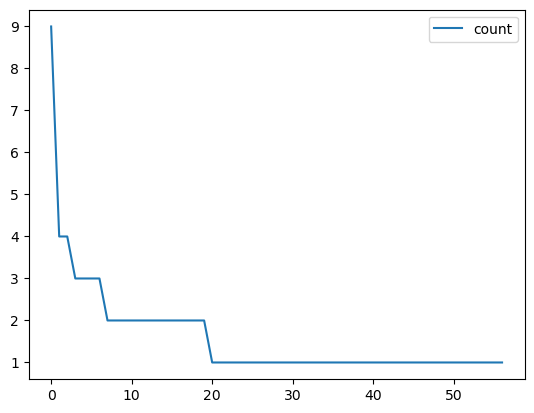

In [22]:
# create a quick bar plot
city_count.plot()

<Axes: title={'center': 'Number of cooling center per city'}, xlabel='city'>

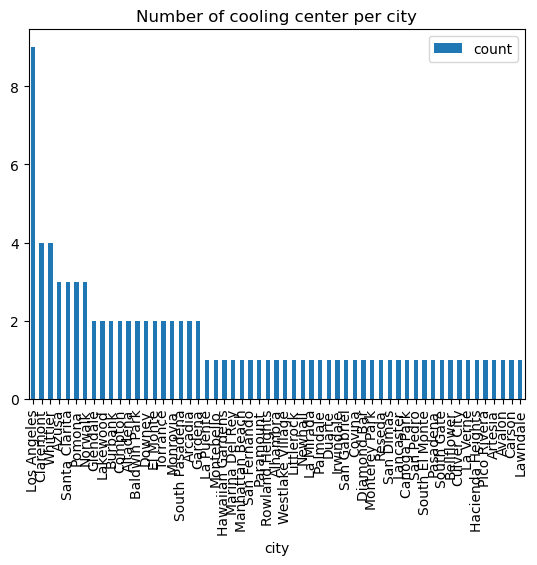

In [24]:
# give it additional arguments
city_count.plot.bar(x = 'city', y = 'count', title = 'Number of cooling center per city')

In [25]:
# too many columns, trim the data
# output the original data's info
cwc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   OBJECTID      92 non-null     int64              
 1   source        89 non-null     object             
 2   ext_id        0 non-null      object             
 3   cat1          92 non-null     object             
 4   cat2          92 non-null     object             
 5   cat3          0 non-null      object             
 6   org_name      61 non-null     object             
 7   Name          92 non-null     object             
 8   addrln1       92 non-null     object             
 9   addrln2       1 non-null      object             
 10  city          92 non-null     object             
 11  state         92 non-null     object             
 12  hours         92 non-null     object             
 13  phones        92 non-null     object             
 14  url 

In [27]:
# show a dataframe with a subset of columns
cwc[['city','zip','Name','latitude','longitude','geometry']]

,city,zip,Name,latitude,longitude,geometry
0,San Gabriel,91776,Asian Youth Center,34.097646,-118.100244,POINT (-118.10024 34.09765)
1,Claremont,91711,City Of Claremont Senior Services - Joslyn Sen...,34.099674,-117.728518,POINT (-117.72852 34.09967)
2,Reseda,91335,Onegeneration - Senior Enrichment Center,34.187236,-118.531121,POINT (-118.53112 34.18724)
3,Gardena,90249,Los Angeles County Community And Senior Servic...,33.902870,-118.303890,POINT (-118.30389 33.90287)
4,San Dimas,91773,City Of San Dimas Parks And Recreation Departm...,34.107240,-117.804700,POINT (-117.80470 34.10724)
...,...,...,...,...,...,...
87,Pomona,91769,Palomares Park Community Center,34.090789,-117.742195,POINT (-117.74220 34.09079)
88,Rowland Heights,91748,Pathfinder Community Regional Park Community C...,33.966664,-117.913333,POINT (-117.91333 33.96666)
89,San Fernando,91340,City of San Fernando - Recreation Park Recreat...,34.281081,-118.434209,POINT (-118.43421 34.28108)
90,Whittier,90604,City of Whittier - Parnell Park Community and ...,33.937303,-118.002713,POINT (-118.00271 33.93730)


In [29]:
# list of desired column names
desired_columns = ['city','zip','Name','latitude','longitude','geometry']

In [30]:
cwc_trimmed = cwc[desired_columns].copy()
cwc_trimmed

,city,zip,Name,latitude,longitude,geometry
0,San Gabriel,91776,Asian Youth Center,34.097646,-118.100244,POINT (-118.10024 34.09765)
1,Claremont,91711,City Of Claremont Senior Services - Joslyn Sen...,34.099674,-117.728518,POINT (-117.72852 34.09967)
2,Reseda,91335,Onegeneration - Senior Enrichment Center,34.187236,-118.531121,POINT (-118.53112 34.18724)
3,Gardena,90249,Los Angeles County Community And Senior Servic...,33.902870,-118.303890,POINT (-118.30389 33.90287)
4,San Dimas,91773,City Of San Dimas Parks And Recreation Departm...,34.107240,-117.804700,POINT (-117.80470 34.10724)
...,...,...,...,...,...,...
87,Pomona,91769,Palomares Park Community Center,34.090789,-117.742195,POINT (-117.74220 34.09079)
88,Rowland Heights,91748,Pathfinder Community Regional Park Community C...,33.966664,-117.913333,POINT (-117.91333 33.96666)
89,San Fernando,91340,City of San Fernando - Recreation Park Recreat...,34.281081,-118.434209,POINT (-118.43421 34.28108)
90,Whittier,90604,City of Whittier - Parnell Park Community and ...,33.937303,-118.002713,POINT (-118.00271 33.93730)


<Axes: >

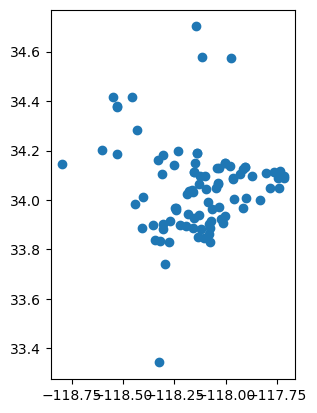

In [32]:
# plot the newly trimmed data
cwc_trimmed.plot()

<Axes: >

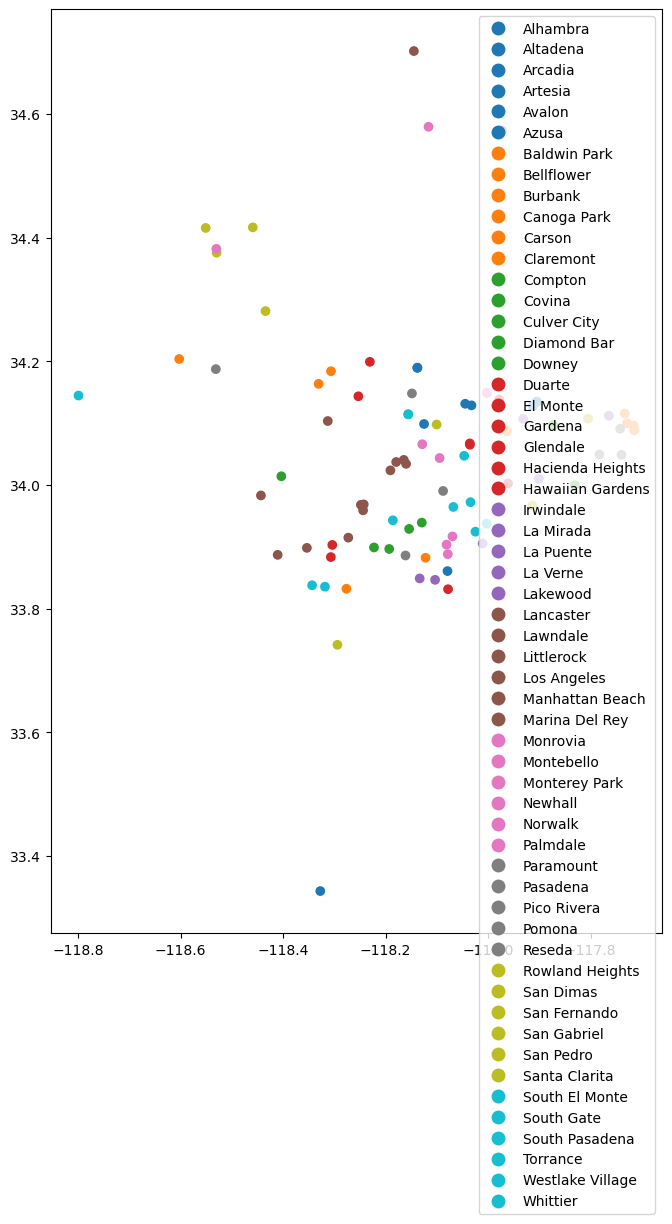

In [33]:
cwc_trimmed.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'city',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

### The amount of cities makes the legend too long. Would be curious to learn how to group cities together, potentially by county districts.

In [34]:
# map with folium
import folium

In [36]:
# average latitude
latitude = cwc_trimmed.latitude.mean()
latitude

34.052288465000004

In [38]:
# average longitude
longitude  = cwc_trimmed.longitude.mean()
longitude

-118.12767729619566

In [39]:
# folium map with arguments
m = folium.Map(location=[latitude,longitude])
m

In [40]:
# adding point markers using a loop
for index, row in cwc_trimmed.iterrows():
    print(row.city, row.latitude, row.longitude)

San Gabriel 34.09764567 -118.10024381
Claremont 34.09967412 -117.72851816
Reseda 34.18723553 -118.53112103
Gardena 33.90287 -118.30389
San Dimas 34.10723993 -117.8046998
Los Angeles 33.914676 -118.272623
Lancaster 34.70164212 -118.14469173
Arcadia 34.131182 -118.044507
Los Angeles 34.03701137 -118.17921257
Santa Clarita 34.3754532 -118.52955992
South Pasadena 34.11404969 -118.15550859
Monrovia 34.149428 -118.001925
Torrance 33.83532532 -118.31820307
Canoga Park 34.20359038 -118.60262096
San Pedro 33.74133395 -118.29384693
Claremont 34.08838223 -117.71452902
Glendale 34.14327412 -118.25300052
Los Angeles 34.040416 -118.164387
South El Monte 34.04700473 -118.04656729
Whittier 33.96434109 -118.06764408
Pasadena 34.14788164 -118.148437
Azusa 34.134623 -117.904753
Norwalk 33.90341528 -118.08087427
Downey 33.92877 -118.153936
Monterey Park 34.065775 -118.128361
Whittier 33.9720389 -118.03415945
South Gate 33.94271343 -118.18571065
Pomona 34.04865877 -117.73955315
Pomona 34.04900542 -117.7826

In [42]:
for index, row in cwc_trimmed.iterrows():
    #add a folium marker code
    folium.Marker([row.latitude, row.longitude], popup=row.city, tooltip=row.city).add_to(m)
m

### Decided not to colorcode since they're all cooling centers.

In [43]:
# save the interactive map as an html file
m.save('cwc.html')